In [21]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [22]:
dir = "p_date=2022-12-08-10_43_54"

In [23]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

19001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [24]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [25]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

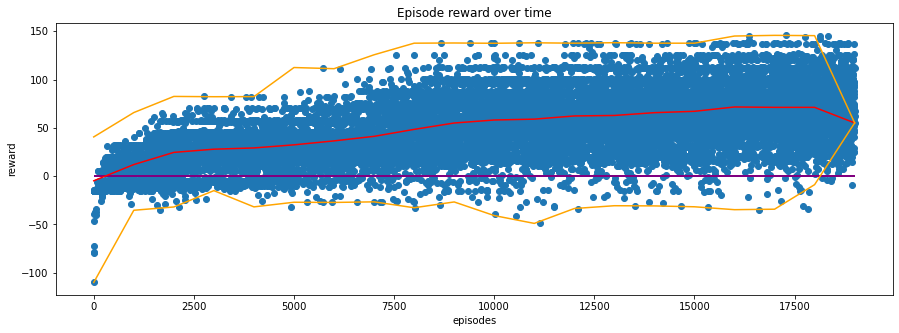

Maximum: 145.70000000000002
Average: 46.9052313036149

Values: -4.8 > 12.0 > 24.6 > 27.9 > 29.2 > 32.4 > 36.5 > 41.2 > 48.4 > 55.0 > 58.1 > 59.0 > 62.3 > 62.8 > 65.7 > 67.1 > 71.6 > 71.2 > 71.2 > 55.1

Minimum (last 1000): -110.0
Average (last 1000): 45.554924726404096
Maximum (last 1000): 145.70000000000002


In [26]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

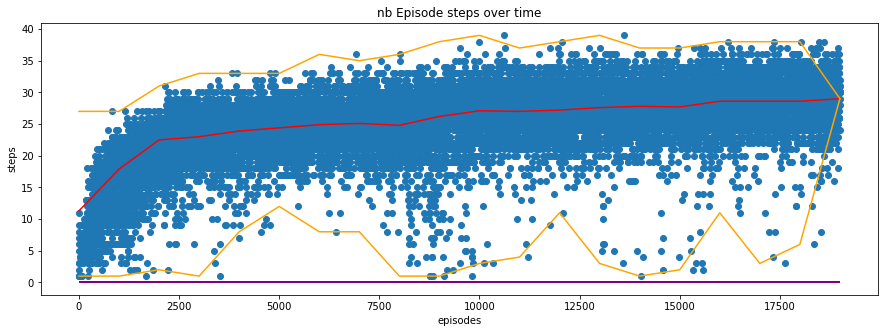

Maximum: 39
Average: 24.956054944476605

Values: 11.3 > 17.9 > 22.5 > 23.0 > 23.9 > 24.4 > 24.9 > 25.1 > 24.8 > 26.2 > 27.1 > 27.0 > 27.2 > 27.6 > 27.8 > 27.7 > 28.6 > 28.6 > 28.6 > 29

Minimum (last 1000): 1
Average (last 1000): 24.751124937503473
Maximum (last 1000): 39


In [27]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

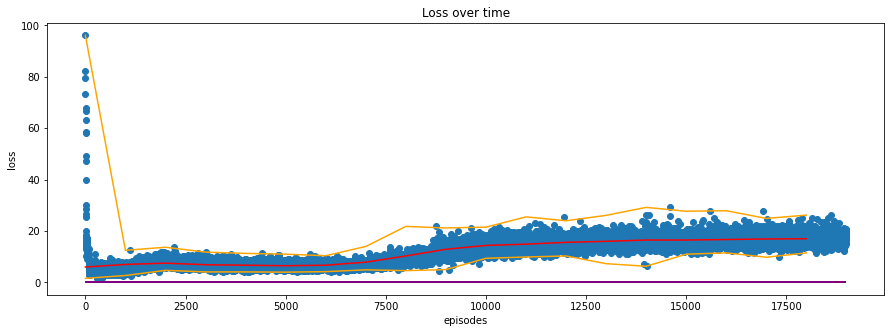

Maximum: 96.11657169886998
Average: 11.733184129459614

Values: 6.0 > 7.0 > 7.5 > 6.9 > 6.7 > 6.5 > 6.7 > 7.9 > 10.3 > 12.9 > 14.4 > 14.9 > 15.6 > 16.0 > 16.5 > 16.5 > 16.7 > 16.9 > 17.0

Minimum (last 1000): 1.6403436660766602
Average (last 1000): 11.43854409710812
Maximum (last 1000): 96.11657169886998


In [28]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

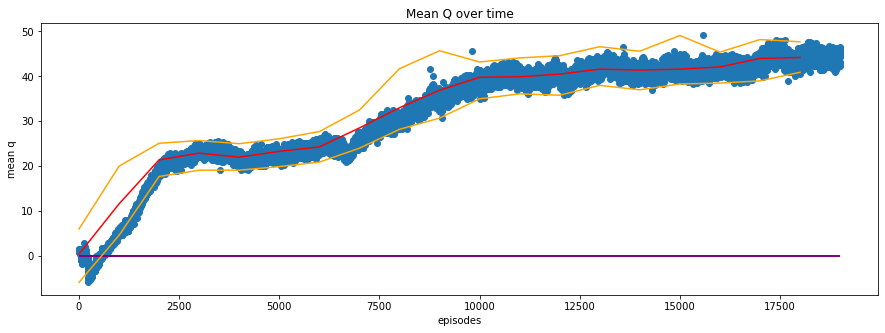

Maximum: 49.130126953125
Average: 31.549943199503275

Values: 0.4 > 11.6 > 21.4 > 22.9 > 22.0 > 23.3 > 24.3 > 28.5 > 33.0 > 36.9 > 39.8 > 39.9 > 40.5 > 41.6 > 41.4 > 41.6 > 42.1 > 44.0 > 44.2

Minimum (last 1000): -5.8839287757873535
Average (last 1000): 30.845064986619775
Maximum (last 1000): 49.130126953125


In [29]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

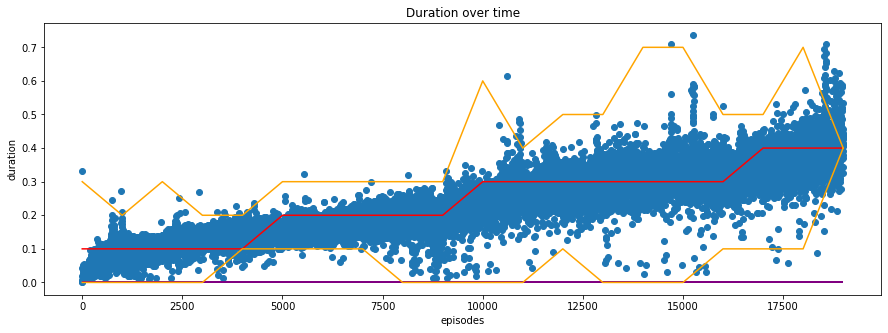

Maximum: 0.7356213000002754
Average: 0.22890792867743748

Values: 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.4 > 0.4 > 0.4

Minimum (last 1000): 0.0016023000000000565
Average (last 1000): 0.21940941835453548
Maximum (last 1000): 0.7356213000002754


In [30]:
plot(duration, "Duration over time", "episodes", "duration")